# Pretrained ML models on Sentinel-2 Images

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from fastai.callbacks import *
import pandas as pd
import os

In [3]:
path = os.getcwd()
path

'/home/jupyter/satellite'

In [4]:
df = pd.read_csv('Level3_labels.csv', header=None, sep='|')
#df1 = df.head(100000)
#df1.head()

In [5]:
tfms = get_transforms(do_flip=True,
                      flip_vert=True,
                      max_lighting=0.2)

data = ImageDataBunch.from_df(path,
                              df,
                              folder='../data/rgb',suffix='.png',
                              label_delim=';',
                              bs=256,
                              seed=42,
                              valid_pct=0.2,
                              ds_tfms=tfms,
                              size=120).normalize(imagenet_stats)

In [6]:
#data.show_batch(rows=2, figsize=(5,5))

In [7]:
# Metrics
acc_02 = partial(accuracy_thresh, thresh=0.4)
f_score = partial(fbeta, thresh=0.4)

# Create cnn with the resnet50 architecture
learner = cnn_learner(data, models.resnet50, metrics=[acc_02,f_score])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


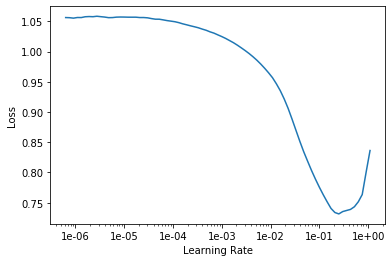

In [8]:
learner.lr_find()
learner.recorder.plot()

In [8]:
lr = 1e-2

In [9]:
#Add callback_fns to Learner for logging
learner.callback_fns.append(partial(CSVLogger,filename='Level3', append=True))
learner.callback_fns.append(ShowGraph)

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.088052,0.082636,0.964960,0.767054,09:06
1,0.087778,0.083030,0.965515,0.756524,09:06
2,0.084807,0.079310,0.966033,0.784775,09:06
3,0.082661,0.077875,0.967018,0.781058,09:06
4,0.081530,0.077337,0.967117,0.785677,09:07


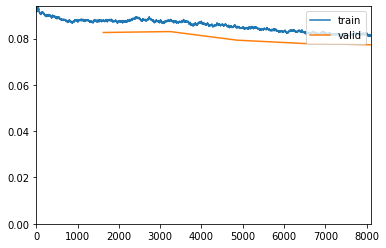

In [14]:
learner.fit_one_cycle(5, slice(lr))

In [15]:
learner.save('Level3_stage-1-rn50')

In [10]:
learner.load('Level3_stage-1-rn50')

Learner(data=ImageDataBunch;

Train: LabelList (415472 items)
x: ImageList
Image (3, 120, 120),Image (3, 120, 120),Image (3, 120, 120),Image (3, 120, 120),Image (3, 120, 120)
y: MultiCategoryList
Non-irrigated arable land;Pastures;Complex cultivation patterns;Land principally occupied by agriculture, with significant areas of natural vegetation;Broad-leaved forest,Broad-leaved forest;Sclerophyllous vegetation;Transitional woodland/shrub,Discontinuous urban fabric;Land principally occupied by agriculture, with significant areas of natural vegetation;Broad-leaved forest,Pastures;Coniferous forest,Mixed forest;Water bodies
Path: /home/jupyter/satellite;

Valid: LabelList (103867 items)
x: ImageList
Image (3, 120, 120),Image (3, 120, 120),Image (3, 120, 120),Image (3, 120, 120),Image (3, 120, 120)
y: MultiCategoryList
Mineral extraction sites;Pastures,Sea and ocean,Discontinuous urban fabric;Complex cultivation patterns;Land principally occupied by agriculture, with significant areas of na

In [11]:
learner.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


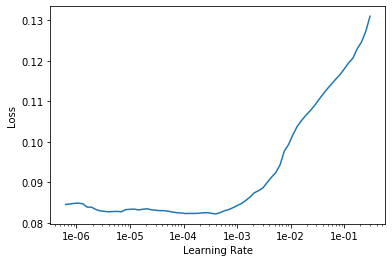

In [17]:
learner.lr_find()
learner.recorder.plot()

In [12]:
lr = 1e-5

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.081890,0.077151,0.967237,0.785884,11:58
1,0.080315,0.076358,0.967481,0.789832,11:51
2,0.079417,0.075580,0.967763,0.793059,11:50
3,0.079378,0.075419,0.967866,0.793227,11:52
4,0.079006,0.075444,0.967816,0.793307,11:51


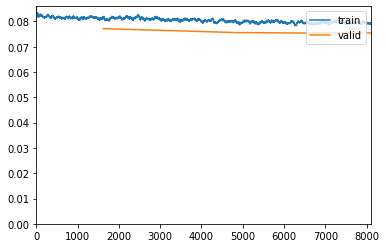

In [13]:
learner.fit_one_cycle(5, slice(lr, lr/5))

In [14]:
learner.save('Level3_stage-2-rn50')

In [15]:
torch.save(learner.model[0].state_dict(), 'models/Level3_stage-2-rn50.h5')

In [7]:
#learner.load('Level3_stage-2-rn50')

Learner(data=ImageDataBunch;

Train: LabelList (415472 items)
x: ImageList
Image (3, 120, 120),Image (3, 120, 120),Image (3, 120, 120),Image (3, 120, 120),Image (3, 120, 120)
y: MultiCategoryList
Non-irrigated arable land;Pastures;Complex cultivation patterns;Land principally occupied by agriculture, with significant areas of natural vegetation;Broad-leaved forest,Sea and ocean,Discontinuous urban fabric;Land principally occupied by agriculture, with significant areas of natural vegetation;Broad-leaved forest,Pastures;Coniferous forest,Non-irrigated arable land;Pastures
Path: /home/jupyter/satellite;

Valid: LabelList (103867 items)
x: ImageList
Image (3, 120, 120),Image (3, 120, 120),Image (3, 120, 120),Image (3, 120, 120),Image (3, 120, 120)
y: MultiCategoryList
Non-irrigated arable land;Land principally occupied by agriculture, with significant areas of natural vegetation;Broad-leaved forest,Non-irrigated arable land;Pastures;Complex cultivation patterns;Broad-leaved forest,Non-irri

### Analysis

In [16]:
#interp = ClassificationInterpretation.from_learner(learner)
interp = learner.interpret()

In [9]:
#losses,idxs = interp.top_losses(data.c)

#len(data.valid_ds)==len(losses)==len(idxs)

In [10]:
#len(data.valid_ds),len(losses), len(idxs)

5141 misclassified samples over 103867 samples in the validation set.


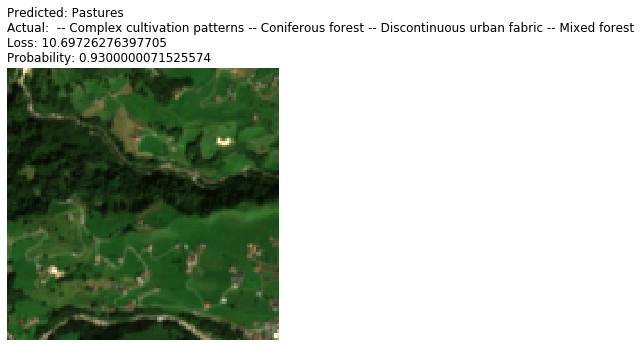

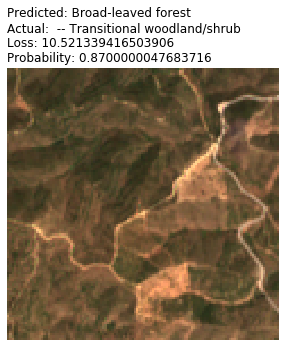

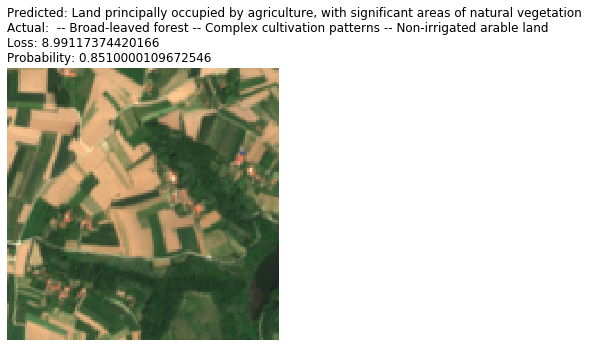

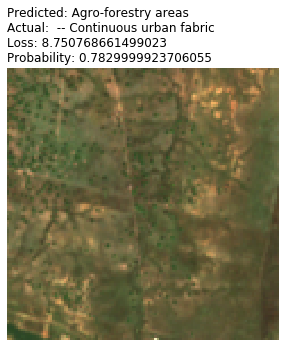

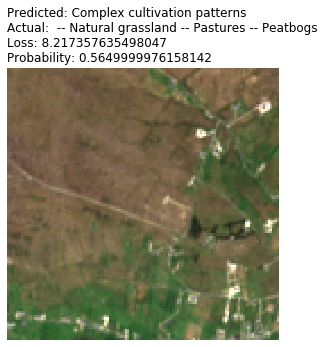

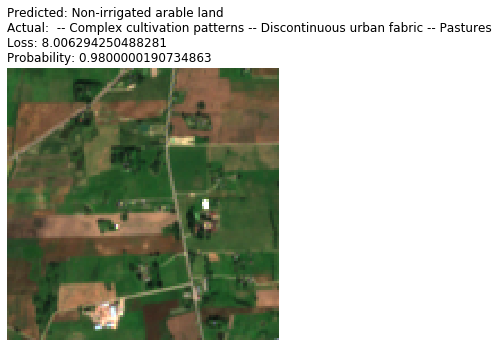

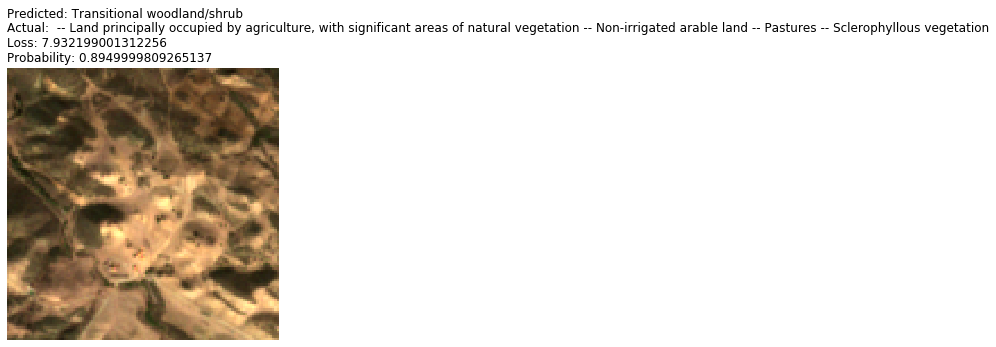

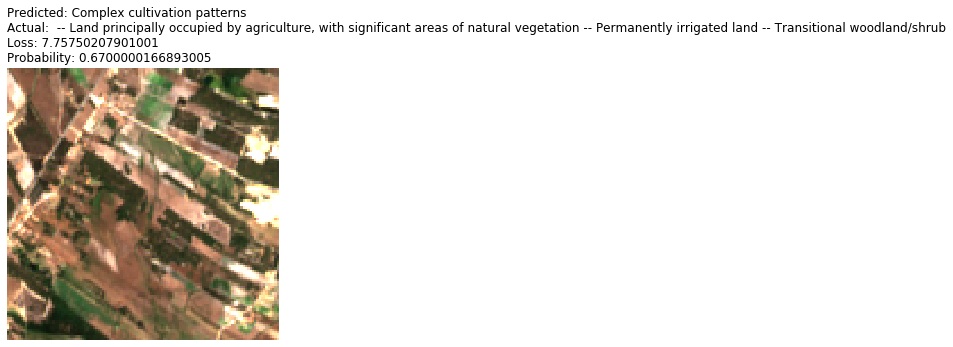

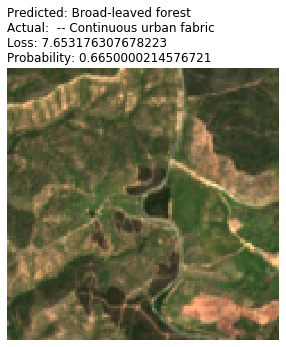

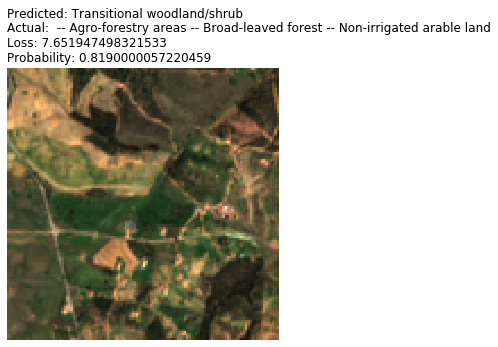

In [17]:
#misclassifieds = interp.plot_multi_top_losses(9, figsize=(5,5), save_misclassified=True)
interp.plot_multi_top_losses(10, figsize=(5,5))

In [13]:
def class2idx(clas):
    return data.classes.index(clas)
classes = data.classes

In [159]:
len(misclassifieds)

5170

In [14]:
data.classes

['Agro-forestry areas',
 'Airports',
 'Annual crops associated with permanent crops',
 'Bare rock',
 'Beaches, dunes, sands',
 'Broad-leaved forest',
 'Burnt areas',
 'Coastal lagoons',
 'Complex cultivation patterns',
 'Coniferous forest',
 'Construction sites',
 'Continuous urban fabric',
 'Discontinuous urban fabric',
 'Dump sites',
 'Estuaries',
 'Fruit trees and berry plantations',
 'Green urban areas',
 'Industrial or commercial units',
 'Inland marshes',
 'Intertidal flats',
 'Land principally occupied by agriculture, with significant areas of natural vegetation',
 'Mineral extraction sites',
 'Mixed forest',
 'Moors and heathland',
 'Natural grassland',
 'Non-irrigated arable land',
 'Olive groves',
 'Pastures',
 'Peatbogs',
 'Permanently irrigated land',
 'Port areas',
 'Rice fields',
 'Road and rail networks and associated land',
 'Salines',
 'Salt marshes',
 'Sclerophyllous vegetation',
 'Sea and ocean',
 'Sparsely vegetated areas',
 'Sport and leisure facilities',
 'Transit